In [302]:
import pickle
import contextily as cx
import matplotlib.pyplot as plt
from tabulate import tabulate
from rorco import load_data
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [303]:

school_geom = pickle.load(open('rorco_data.pkl', 'rb'))
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

### Data Summary

<Axes: xlabel='Academic Year'>

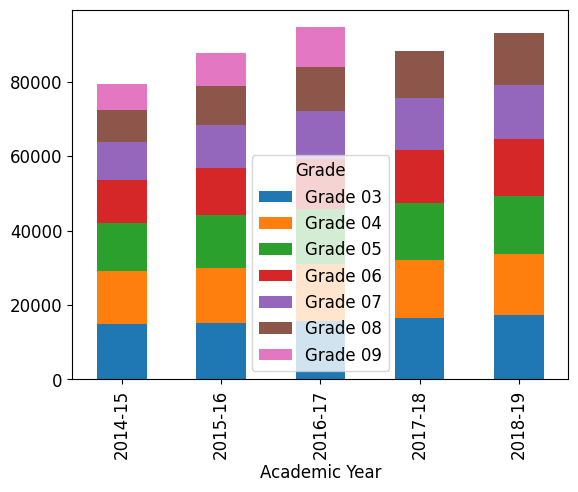

In [304]:
school_geom.groupby(['Academic Year', 'Grade'])['num_from_RORCO'].sum().unstack().plot(kind='bar', stacked=True)

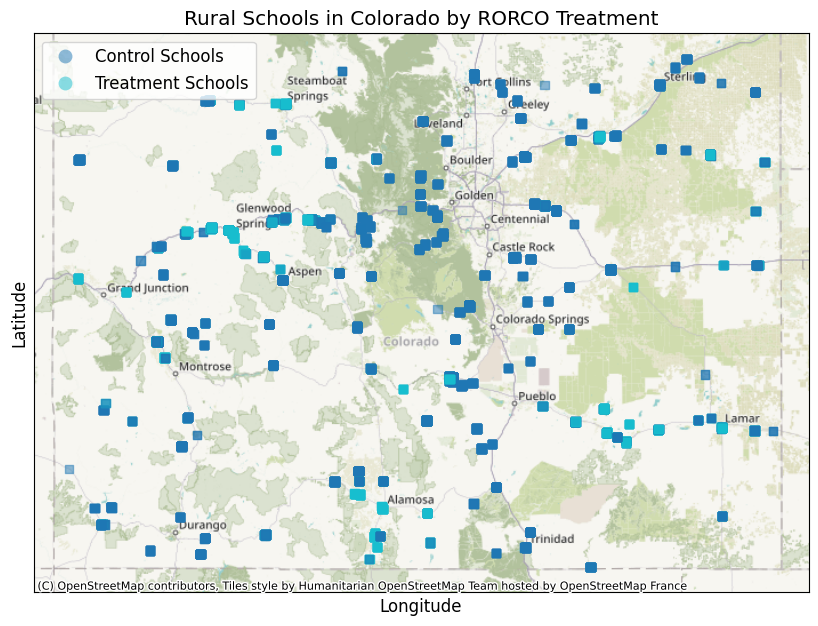

In [305]:
school_geom_rural = school_geom[school_geom['is_rural'] == True]
column_name = 'is_RORCO'
ax = school_geom_rural.plot(
    column=column_name, figsize=(10,10), alpha=.5, categorical=True, legend=True, marker=',',# cmap='viridis',
    legend_kwds={'fmt':'%.0f', 'labels':['Control Schools', 'Treatment Schools']}
)
cx.add_basemap(ax, crs=school_geom.crs.to_string())
plt.title('Rural Schools in Colorado by RORCO Treatment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_xticks([])
ax.set_yticks([])
plt.plot()
plt.savefig(f'../../images/RORCO_{column_name}.pdf')

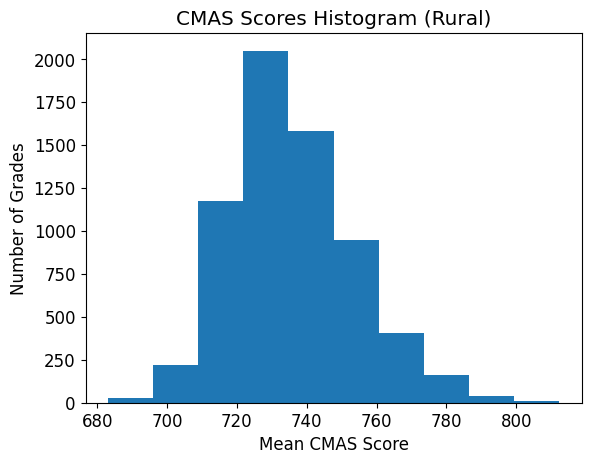

In [306]:
plt.hist(school_geom['Mean Scale Score'][school_geom['is_RORCO'] == 1])
plt.title('CMAS Scores Histogram (Rural)')
plt.xlabel('Mean CMAS Score')
plt.ylabel('Number of Grades')
plt.savefig(f'../../images/cmas_hist.pdf')
plt.show()

In [307]:
# Number of treatment and control
school_geom['is_RORCO'].value_counts()

is_RORCO
0    15052
1     6611
Name: count, dtype: int64

In [308]:
# Number of students receive books
# CEO of RORCO said about 1/4 of students receive books
school_geom['num_from_RORCO'].sum() / school_geom['Capacity'].sum()

0.23994620149630475

In [309]:
print(len(school_geom[school_geom['is_rural']==1]))
school_geom[school_geom['is_rural']==1]['is_RORCO'].value_counts()

4178


is_RORCO
0    3121
1    1057
Name: count, dtype: int64

In [310]:
X = school_geom.copy()

# Only consider rural schools
X = X[X['is_rural']==1]

X.columns = [col.title() for col in X.columns]

X.columns = [col.replace('For All Students', '').replace('Th', 'th').replace('Total ', '').replace('St', 'st').replace('Nd', 'nd').replace('Rd', 'rd').replace('Fte', 'FTE').replace('.1', '') for col in X.columns]

# Remove these columns
remove_columns = ['_X', 'School Code', 'Phone', 'Congressional District', 'Zip Code', 'FTE.2', 'Average Salary.2', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th']

X = X.drop(columns=remove_columns)

print(tabulate(X.describe(percentiles=[]).T, headers='keys',  tablefmt='latex'))

\begin{tabular}{lrrrrrr}
\hline
                                &   count &           mean &           std &       min &        50\% &         max \\
\hline
 Low Grade                      &    4178 &    28.3492     &    29.4807    &    2      &     6      &     90      \\
 High Grade                     &    4178 &    73.2312     &    24.9566    &   20      &    80      &    120      \\
 Latitude                       &    4178 &    39.0379     &     1.02844   &   37.0191 &    39.2469 &     40.8236 \\
 Longitude                      &    4178 &  -105.645      &     1.64942   & -108.904  &  -105.52   &   -102.123  \\
 County Code                    &    4178 &    33.529      &    18.9398    &    1      &    32      &     98      \\
 District Code                  &    4178 &  1756.8        &  1150.84      &   50      &  1500      &   8001      \\
 K-12 Count                     &    4178 &   284.362      &   148.374     &   25      &   259.5    &   1132      \\
 Free Lunch             

In [311]:
school_geom['Mean Scale Score']

triple_index
2014-15_Grade 03_17      745.316327
2014-15_Grade 04_17      749.119266
2014-15_Grade 05_17          754.13
2015-16_Grade 03_17      744.148936
2015-16_Grade 04_17      753.159574
                            ...    
2018-19_Grade 03_2328        779.75
2016-17_Grade 03_3846    733.708333
2017-18_Grade 03_3846      755.4375
2017-18_Grade 04_3846    742.380952
2018-19_Grade 05_7764    723.421053
Name: Mean Scale Score, Length: 21663, dtype: object